In [172]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from pdb import set_trace as keyboard
from IPython import display
import time
import pylab
import pandas as pd

In [174]:
def prettifyAx(ax, spinesToRemove):
    ax.set_facecolor('xkcd:white')
    for spine in spinesToRemove:
        ax.spines[spine].set_visible(False)    

### Cos of a VA

In [57]:
N = int(1e3)
y = np.zeros(N)
t_array = np.linspace(0, N-1, N)
#steps = np.random.choice([-1, 1], int(1e6))

In [80]:
var = .1
mi = .15 * np.pi

In [81]:
omega = .1*np.pi
y = np.cos(omega * np.random.normal(mi, np.sqrt(var), N))

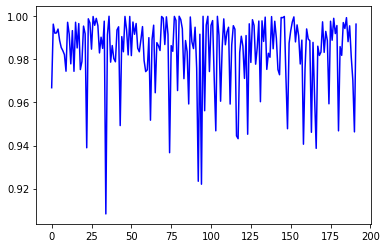

KeyboardInterrupt: 

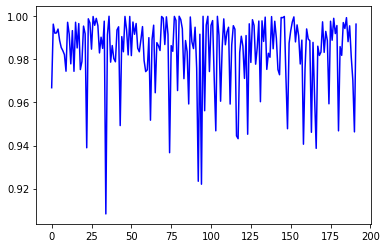

In [82]:
fig, ax = plt.subplots()

for t in range(1, N):
    if t % 1 == 0:
        if True:
            plt.cla()
            ax.plot(y[:t+1], 'b')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.1)

### Random Walk

In [76]:
N = int(1e3)
y = np.zeros(N)
t_array = np.array(list(range(N)))
n_processes = 20
pctg_inside_std = np.zeros(N)

In [ ]:
var = .005
yInicial = 10

In [ ]:
dic_params = {}
dic_params['steps'] = {}
dic_params['rw'] = {}

upperStd = np.sqrt(var*t_array) + yInicial
lowerStd = -np.sqrt(var*t_array) + yInicial

r = np.random.RandomState(1234)
for i in range(n_processes):
    dic_params['steps'][i] = r.normal(0, np.sqrt(var), N)
    dic_params['steps'][i][0] = yInicial
    dic_params['rw'][i] = np.cumsum(dic_params['steps'][i])

In [ ]:
df_steps = pd.DataFrame(dic_params['rw'])
for t in t_array:
    n_inside = 0
    for j in range(n_processes):
        el = df_steps.iloc[t][j]
        if el >= lowerStd[t] and el <= upperStd[t]:
            n_inside += 1
    pctg_inside_std[t] = n_inside/n_processes

KeyboardInterrupt: 

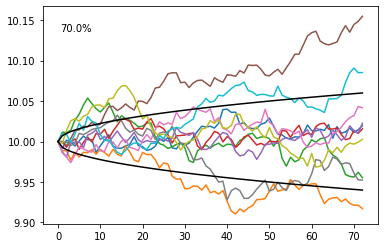

In [210]:
fig, ax = plt.subplots()

for t in range(1, N):
    plt.cla()
    for i in range(n_processes):
        ax.plot(dic_params['rw'][i][:t+1])
    ax.plot(upperStd[:t+1], 'k')
    ax.plot(lowerStd[:t+1], 'k')
    pylab.text(0.1, 0.9,'%s%%' % round(pctg_inside_std[t]*100., 2), ha='center', va='center', transform=ax.transAxes)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)

### Random Walk with Drift

In [105]:
N = int(1e3)
y = np.zeros(N)
t_array = list(range(N))
n_processes = 10
pctg_inside_std = np.zeros(N)

In [211]:
var = .00005
mi = 2 * 1e-2
yInicial = 10

In [212]:
dic_params = {}
dic_params['steps'] = {}
dic_params['rw'] = {}

upperStd = np.zeros(N)
lowerStd = np.zeros(N)
for t_index, t in enumerate(t_array):
    upperStd[t_index] = np.sqrt(var*t) + yInicial + t*mi
    lowerStd[t_index] = -np.sqrt(var*t) + yInicial + t*mi


for i in range(n_processes):
    dic_params['steps'][i] = np.random.normal(mi, np.sqrt(var), N)
    dic_params['steps'][i][0] = yInicial
    dic_params['rw'][i] = np.cumsum(dic_params['steps'][i])

In [213]:
df_steps = pd.DataFrame(dic_params['rw'])
for t in t_array:
    n_inside = 0
    for j in range(n_processes):
        el = df_steps.iloc[t][j]
        if el >= lowerStd[t] and el <= upperStd[t]:
            n_inside += 1
    pctg_inside_std[t] = n_inside/n_processes

KeyboardInterrupt: 

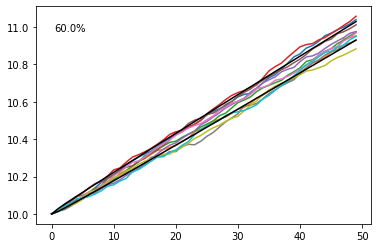

In [214]:
fig, ax = plt.subplots()

for t in t_array:
    plt.cla()
    for i in range(n_processes):
        ax.plot(dic_params['rw'][i][:t+1])
    ax.plot(upperStd[:t+1], 'k')
    ax.plot(lowerStd[:t+1], 'k')
    pylab.text(0.1, 0.9,'%s%%' % round(pctg_inside_std[t]*100., 2), ha='center', va='center', transform=ax.transAxes)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)

### Random Walk - Log Normal

In [130]:
N = int(1e3)
y = np.zeros(N)
t_array = np.array(list(range(N)))
n_processes = 10
pctg_inside_std = np.zeros(N)

In [199]:
var = .00005
mi = 0 * 1e-2
yInicial = 40

In [220]:
dic_params = {}
dic_params['steps'] = {}
dic_params['rw'] = {}

upperStd = np.exp(np.sqrt(var*t_array) + np.log(yInicial))
lowerStd = np.exp(-np.sqrt(var*t_array) + np.log(yInicial))

for i in range(n_processes):
    dic_params['steps'][i] = np.random.normal(mi, np.sqrt(var), N)
    dic_params['steps'][i][0] = 0
    dic_params['rw'][i] = yInicial*np.exp(np.cumsum(dic_params['steps'][i]))

In [221]:
max(dic_params['steps'][0]), min(dic_params['steps'][0])

(0.04374168545251898, -0.0019125027723626287)

In [222]:
"""
fig, ax = plt.subplots()
_ = ax.hist(dic_params['steps'][0])
"""

"\nfig, ax = plt.subplots()\n_ = ax.hist(dic_params['steps'][0])\n"

In [223]:
df_steps = pd.DataFrame(dic_params['rw'])
for t in t_array:
    n_inside = 0
    for j in range(n_processes):
        el = df_steps.iloc[t][j]
        if el >= lowerStd[t] and el <= upperStd[t]:
            n_inside += 1
    pctg_inside_std[t] = n_inside/n_processes

In [233]:
"""
fig, ax = plt.subplots()
ax.hist(dic_params['rw'][0], 50)
"""

"\nfig, ax = plt.subplots()\nax.hist(dic_params['rw'][0], 50)\n"

KeyboardInterrupt: 

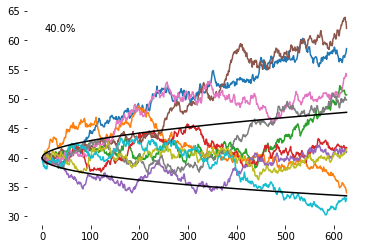

In [205]:
fig, ax = plt.subplots()

for t in t_array:
    plt.cla()
    for i in range(n_processes):
        ax.plot(dic_params['rw'][i][:t+1])
    ax.plot(upperStd[:t+1], 'k')
    ax.plot(lowerStd[:t+1], 'k')
    prettifyAx(ax, ['left', 'right', 'top', 'bottom'])
    pylab.text(0.1, 0.9,'%s%%' % round(pctg_inside_std[t]*100., 2), ha='center', va='center', transform=ax.transAxes)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)

### Random Walk - Log Normal Steps

In [381]:
N = int(1e3)
y = np.zeros(N)
t_array = np.array(list(range(N)))
n_processes = 100
pctg_inside_std = np.zeros(N)

In [382]:
var = 0.005
mi = 1 * 1e-2
yInicial = 40

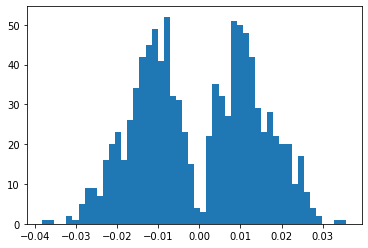

In [383]:
dic_params = {}
dic_params['steps'] = {}
dic_params['rw'] = {}

upperStd = np.sqrt(var*t_array) + yInicial
lowerStd = -np.sqrt(var*t_array) + yInicial

for i in range(n_processes):
    random_sign = [np.random.choice([-1, 1]) for _ in t_array]
    dic_params['steps'][i] = random_sign * np.random.rayleigh(mi, N)
    dic_params['steps'][i][0] = yInicial
    dic_params['rw'][i] = np.zeros(N)
    dic_params['rw'][i][0] = yInicial
    for t in t_array[1:]:
        dic_params['rw'][i][t] = dic_params['rw'][i][t-1] * (1 + dic_params['steps'][i][t])
    

fig, ax = plt.subplots()
_ = ax.hist(dic_params['steps'][0][1:], bins=50)

In [384]:
df_steps = pd.DataFrame(dic_params['rw'])
for t in t_array:
    n_inside = 0
    for j in range(n_processes):
        el = df_steps.iloc[t][j]
        if el >= lowerStd[t] and el <= upperStd[t]:
            n_inside += 1
    pctg_inside_std[t] = n_inside/n_processes

KeyboardInterrupt: 

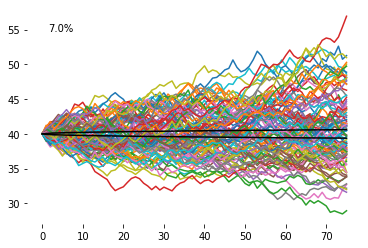

In [385]:
fig, ax = plt.subplots()

for t in t_array:
    plt.cla()
    for i in range(n_processes):
        ax.plot(dic_params['rw'][i][:t+1])
    ax.plot(upperStd[:t+1], 'k')
    ax.plot(lowerStd[:t+1], 'k')
    prettifyAx(ax, ['left', 'right', 'top', 'bottom'])
    pylab.text(0.1, 0.9,'%s%%' % round(pctg_inside_std[t]*100., 2), ha='center', va='center', transform=ax.transAxes)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.0001)